In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from sklearn.cluster import KMeans
from skimage.feature import hog 
from skimage import exposure
from skimage.measure import label

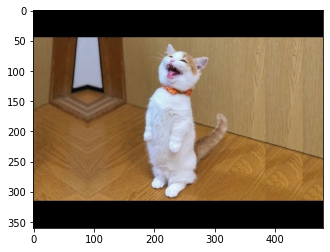

In [2]:
cat = cv2.imread('./Animals/Animals/Cats/cat5.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_RGB2BGR)
plt.imshow(cat)


C:\Users\Chanawee\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


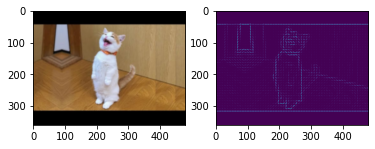

In [3]:
blur = cv2.GaussianBlur(cat,(5,5),0)
fd, hog_image = hog(blur, orientations=9, 
pixels_per_cell=(8,8),cells_per_block=(2,2), visualize=True, multichannel=True)
fig, axs = plt.subplots(1,2)

axs[0].imshow(blur)
axs[1].imshow(hog_image)




In [4]:
block_size = (40,20)
stride = (5,5)


In [5]:
posRow = np.arange(0, cat.shape[0] - block_size[0],stride[0])
posCol = np.arange(0, cat.shape[1] - block_size[1],stride[1])
print(posCol)
print(len(posCol))

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455]
92


In [6]:
hogfeatures = []
for i in range(len(posRow)):
    for j in range(len(posCol)):
        startH = posRow[i]
        endH = posRow[i]+block_size[0]
        startW = posCol[j]
        endW = posCol[j] + block_size[1]
        subImg = cat[startH:endH,startW:endW, :]

        blur = cv2.GaussianBlur(subImg,(5,5),0)
        fd, hog_image = hog(blur, orientations=9, 
        pixels_per_cell=(8,8),cells_per_block=(2,2), visualize=True, multichannel=True)

        hogfeatures.append(fd)

In [7]:
N = 2
kmeans = KMeans(n_clusters = N, random_state = 0)
clusters = kmeans.fit_predict(hogfeatures)

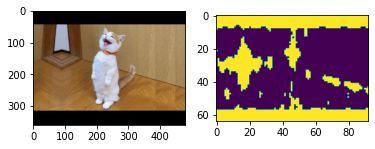

In [8]:
cluster_array = clusters.reshape(len(posRow),len(posCol))
fig, axs = plt.subplots(1,2)
axs[0].imshow(cat)
axs[1].imshow(cluster_array)
# plt.imshow(cluster_array)

In [30]:
from skimage.measure import label
from skimage import measure

In [31]:
all_labels = measure.label(cluster_array)
color = (255,0,0)
thickness = 1


IndexError: index 4 is out of bounds for axis 0 with size 4

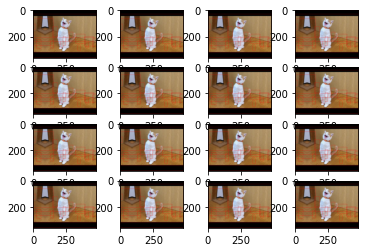

In [36]:
nClass = np.unique(all_labels)
fig, axs = plt.subplots(4,4)
row = 0
col = 0
for i in nClass :
    objPos = np.argwhere(all_labels == i)
    startBlockH = objPos[:,0].min()
    endBlockH = objPos[:,0].max()
    startBlockW = objPos[:,1].min()
    endBlockW = objPos[:,1].max()
    startF = (posCol[startBlockW],posRow[startBlockH])
    endF = (posCol[endBlockW]+block_size[1],posRow[endBlockH]+block_size[0])
    ROI_bounding_img = cv2.rectangle(cat, startF, endF, color, thickness) 
    axs[row][col].imshow(ROI_bounding_img)
    row += 1
    if row == 4 :
        row = 0
        col += 1